In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = np.loadtxt('UCI_processed_data.txt')

In [3]:
X, y = data[:, :-1], data[:, -1]

In [4]:
scalar = MinMaxScaler()

In [5]:
X = scalar.fit_transform(X)

In [6]:
data = np.concatenate([X, y.reshape((-1, 1))], axis=1)

In [7]:
args = np.random.randn(302)
args[-1] = 100

In [8]:
from distributions import Distribution, HierarchicalBayesianLogisticRegression

In [9]:
from hmc import HMC

In [10]:
dist = HierarchicalBayesianLogisticRegression(300)

In [11]:
syo = HMC(dist.logp, dist.dlogp, dt=1e-4, L=5, M=0.1*np.identity(302), n_args=302, prop='calvo')

In [12]:
a = syo.sample(100, data, args)

In [13]:
a

array([[  0.37389414,  -0.33042484,  -0.57997889, ...,   1.1005416 ,
         -0.14060349, 100.        ],
       [  0.37567901,  -0.32856687,  -0.57859322, ...,   1.09953189,
         -0.14210417, 100.00077629],
       [  0.37763426,  -0.32751755,  -0.57928815, ...,   1.0970655 ,
         -0.14025607,  99.99998628],
       ...,
       [  0.42746196,  -0.27320917,  -0.51020888, ...,   1.11138191,
         -0.13073784, 100.01124952],
       [  0.42761664,  -0.27270485,  -0.51254668, ...,   1.11144247,
         -0.12895569, 100.01249293],
       [  0.42587332,  -0.27077334,  -0.5113721 , ...,   1.11104961,
         -0.1321829 , 100.01247189]])

In [13]:
beta = np.random.randn(300)

In [15]:
import matplotlib.pyplot as plt

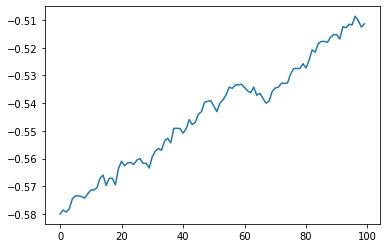

In [18]:
plt.plot(range(100), a[:, 2])